# Final Assignment Notebook 

Author: Daniel Hellebust

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import pandas_profiling

# Notebook settings
pd.set_option("display.max_rows", None,"display.max_columns", None)
%matplotlib inline

In [2]:
# load dataset
df = pd.read_csv('garments_worker_productivity.csv',sep=',')
df.head(5)

date   quarter  department       day  team  targeted_productivity  \
0  1/1/2015  Quarter1      sweing  Thursday     8                   0.80   
1  1/1/2015  Quarter1  finishing   Thursday     1                   0.75   
2  1/1/2015  Quarter1      sweing  Thursday    11                   0.80   
3  1/1/2015  Quarter1      sweing  Thursday    12                   0.80   
4  1/1/2015  Quarter1      sweing  Thursday     6                   0.80   

     smv     wip  over_time  incentive  idle_time  idle_men  \
0  26.16  1108.0       7080         98        0.0         0   
1   3.94     NaN        960          0        0.0         0   
2  11.41   968.0       3660         50        0.0         0   
3  11.41   968.0       3660         50        0.0         0   
4  25.90  1170.0       1920         50        0.0         0   

   no_of_style_change  no_of_workers  actual_productivity  
0                   0           59.0             0.940725  
1                   0            8.0             0.886500  
2                   0           30.5             0.800570  
3                   0           30.5             0.800570  
4                   0           56.0             0.800382

## Data preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

### Change date column datatype to datetime

In [4]:
df['date']= df['date'].astype('datetime64')

 ### Inspect categorical variables

In [5]:
for column in df.columns:
    if df[column].dtypes == 'object':
        print(f'Column: {column}\n')
        print(df[column].value_counts())
        print('---------------------')

Column: quarter

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64
---------------------
Column: department

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64
---------------------
Column: day

Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: day, dtype: int64
---------------------


### Column department has two 'finishing' classes. Check for whitespaces.

#### Remove whitespaces from column names

In [6]:
df.columns = df.columns.str.replace(' ', '')

#### Remove whitespaces from categorical variables category names.

In [7]:
for column in df.columns:
    if df[column].dtypes == 'object':
        df[column] = df[column].str.strip()
        print(f'Column: {column}\n')
        print(df[column].value_counts())
        print('---------------------')

Column: quarter

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64
---------------------
Column: department

sweing       691
finishing    506
Name: department, dtype: int64
---------------------
Column: day

Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: day, dtype: int64
---------------------


In [8]:
### Rename sweing to sewing in column department, assuming typo. 

In [9]:
df = df.replace({'department':{'sweing':'sewing'}})
df['department'].value_counts()

sewing       691
finishing    506
Name: department, dtype: int64

### Check for duplicate rows

In [10]:
df.duplicated().sum()

0

### Check for missing values

In [11]:
df.isna().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [12]:
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [13]:
wip_df = df[df.wip.isna()]
print('Missing values of wip by department')
wip_df['department'].value_counts().to_frame()

Missing values of wip by department


department
finishing         506

### Inspecting numerical variables

#### The 'team' column seems like a categorical variable, since it is associated with the team number. 
Changing datatype to categorical and rename for readability. 

In [14]:
df = df.replace({'team':{1:'team_01', 2:'team_02', 3:'team_03', 4:'team_04', 5:'team_05', 6:'team_06', 7:'team_07', 8:'team_08',
                         9:'team_09', 10:'team_10', 11:'team_11', 12:'team_12'}})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1197 non-null   object        
 2   department             1197 non-null   object        
 3   day                    1197 non-null   object        
 4   team                   1197 non-null   object        
 5   targeted_productivity  1197 non-null   float64       
 6   smv                    1197 non-null   float64       
 7   wip                    691 non-null    float64       
 8   over_time              1197 non-null   int64         
 9   incentive              1197 non-null   int64         
 10  idle_time              1197 non-null   float64       
 11  idle_men               1197 non-null   int64         
 12  no_of_style_change     1197 non-null   int64         
 13  no_

### Inspecting missing values in 'wip' column

In [15]:
wip_nan = df[df.wip.isna()]
wip_nan.head()

date   quarter department       day     team  targeted_productivity  \
1  2015-01-01  Quarter1  finishing  Thursday  team_01                   0.75   
6  2015-01-01  Quarter1  finishing  Thursday  team_02                   0.75   
13 2015-01-01  Quarter1  finishing  Thursday  team_10                   0.65   
14 2015-01-01  Quarter1  finishing  Thursday  team_08                   0.75   
15 2015-01-01  Quarter1  finishing  Thursday  team_04                   0.75   

     smv  wip  over_time  incentive  idle_time  idle_men  no_of_style_change  \
1   3.94  NaN        960          0        0.0         0                   0   
6   3.94  NaN        960          0        0.0         0                   0   
13  3.94  NaN        960          0        0.0         0                   0   
14  2.90  NaN        960          0        0.0         0                   0   
15  3.94  NaN       2160          0        0.0         0                   0   

    no_of_workers  actual_productivity  
1             8.0             0.886500  
6             8.0             0.755167  
13            8.0             0.705917  
14            8.0             0.676667  
15           18.0             0.593056

In [16]:
for column in wip_nan.columns:
    if wip_nan[column].dtypes == 'object':
        print(f'Column: {column}\n')
        print(wip_nan[column].value_counts())
        print('---------------------')

Column: quarter

Quarter1    149
Quarter2    147
Quarter4    108
Quarter3     81
Quarter5     21
Name: quarter, dtype: int64
---------------------
Column: department

finishing    506
Name: department, dtype: int64
---------------------
Column: day

Wednesday    89
Sunday       87
Monday       83
Tuesday      83
Saturday     83
Thursday     81
Name: day, dtype: int64
---------------------
Column: team

team_08    53
team_02    52
team_01    49
team_09    46
team_04    46
team_10    43
team_07    41
team_12    40
team_03    37
team_06    35
team_05    35
team_11    29
Name: team, dtype: int64
---------------------


### Seems like all instances from department 'finishing' has missing value for the 'wip' column

In [17]:
df_nan = df[(df.department == 'sewing')&(df.wip.isna())]
df_nan.count()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

#### The 'wip' column stand for 'work in progress' and missing value in all instances of department 'finishing' indicates there are no work in progress in the department. I will replace the missing value with zero work in progress. 

In [18]:
df['wip'].fillna(0,inplace=True)

In [19]:
df.isna().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

### Check distribution of continous variables

Box plot actual productivity by department


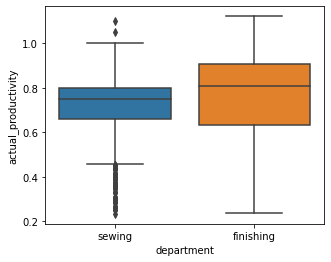

In [20]:
print('Box plot actual productivity by department')
plt.figure(figsize=(5,4))
sns.boxplot(x='department', y='actual_productivity', data=df);

Box plot targeted productivity by department


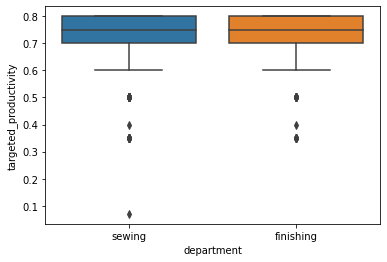

In [21]:
print('Box plot targeted productivity by department')
sns.boxplot(x='department', y='targeted_productivity', data=df);

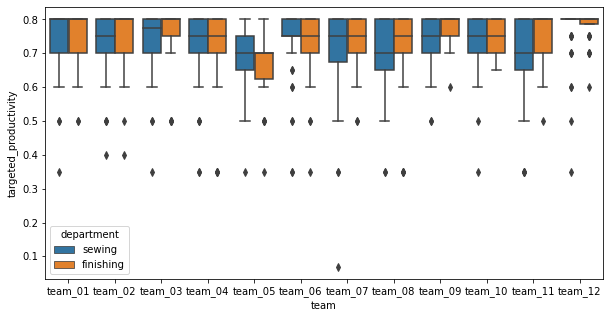

In [22]:
plt.figure(figsize=(10,5))
sns.boxplot(x='team', y='targeted_productivity', data=df.sort_values(by='team', ascending=True), hue='department');

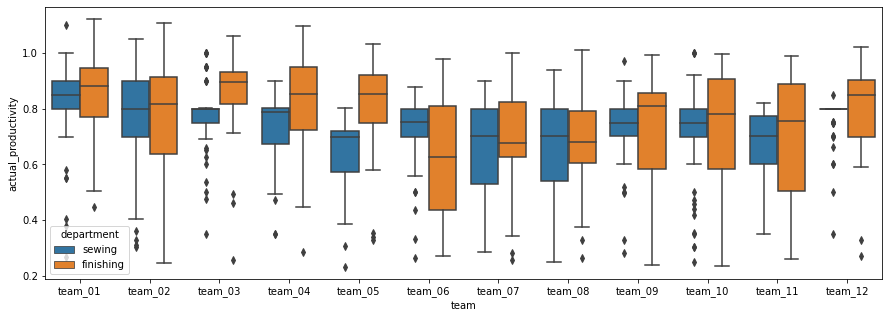

In [23]:
plt.figure(figsize=(15,5))
sns.boxplot(x='team', y='actual_productivity', data=df.sort_values(by='team', ascending=True), hue='department');

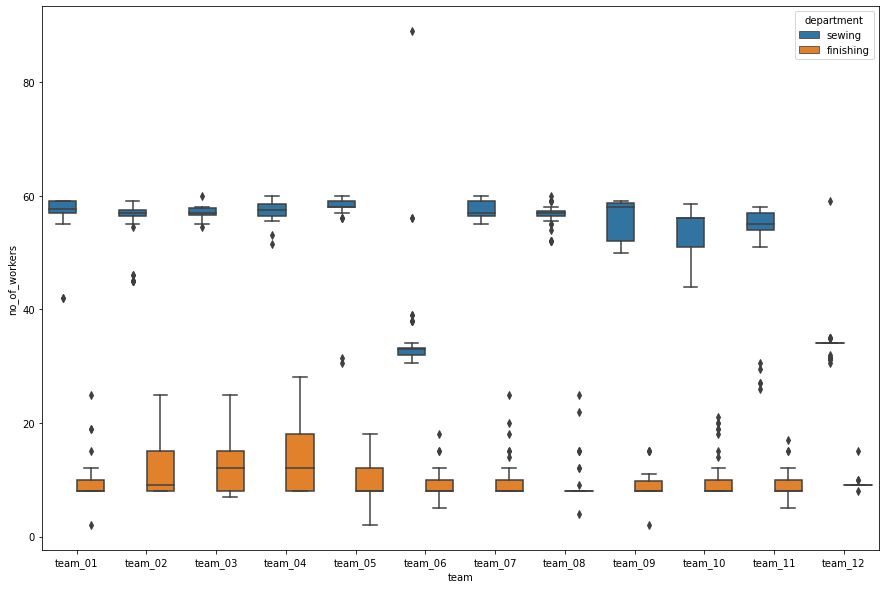

In [24]:
plt.figure(figsize=(15,10))
sns.boxplot(x='team', y='no_of_workers', hue='department', data=df.sort_values(by='team', ascending=True));

Box plot standard minute value(smv) by team and department


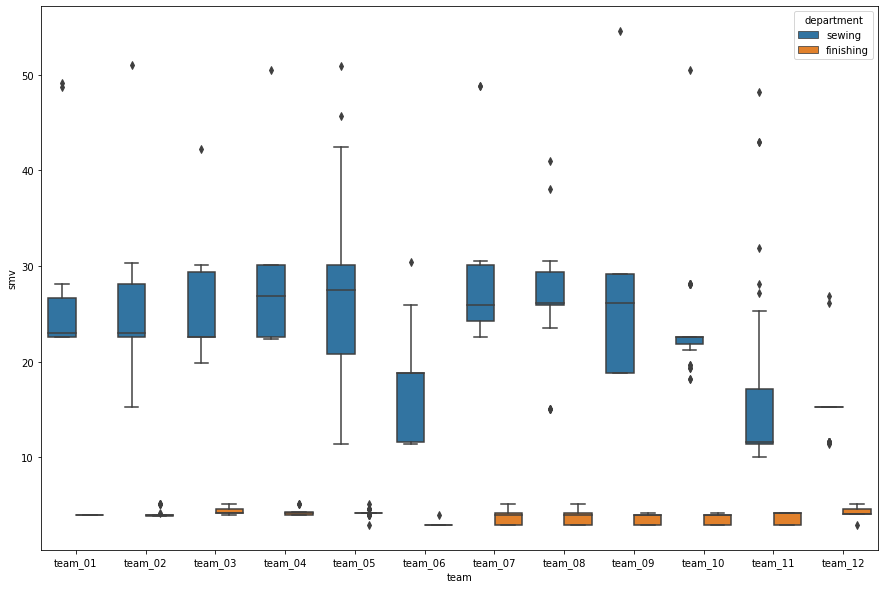

In [25]:
print('Box plot standard minute value(smv) by team and department')
plt.figure(figsize=(15,10))
sns.boxplot(x='team', y='smv', data=df.sort_values(by='team', ascending=True), hue='department');

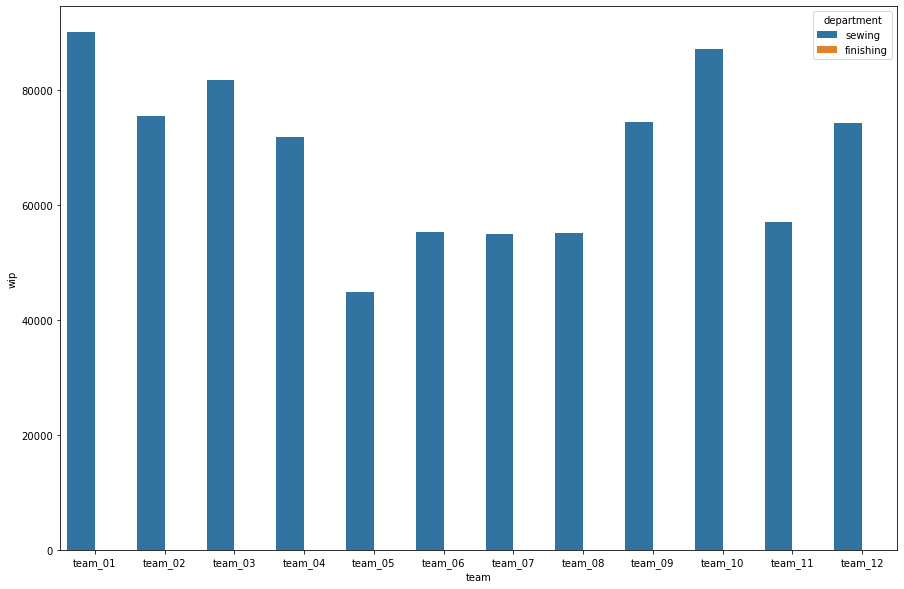

In [26]:
plt.figure(figsize=(15,10))
sns.barplot(x='team', y='wip', data=df.sort_values(by='team', ascending=True), hue='department', estimator=sum, ci=None);

Total incentive by team and department


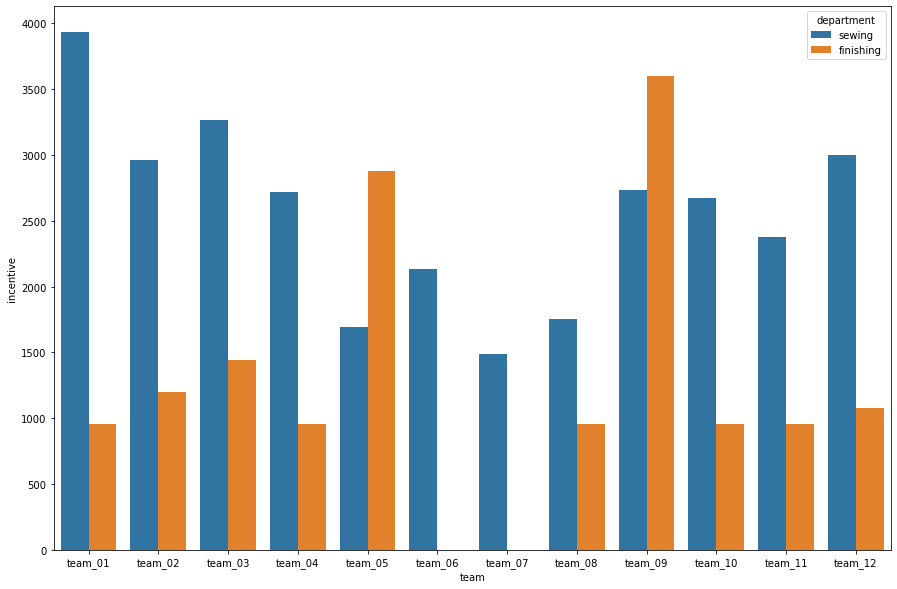

In [27]:
plt.figure(figsize=(15,10))
print('Total incentive by team and department')
sns.barplot(x='team', y='incentive', data=df.sort_values(by='team', ascending=True),estimator=sum, ci=None, hue='department');

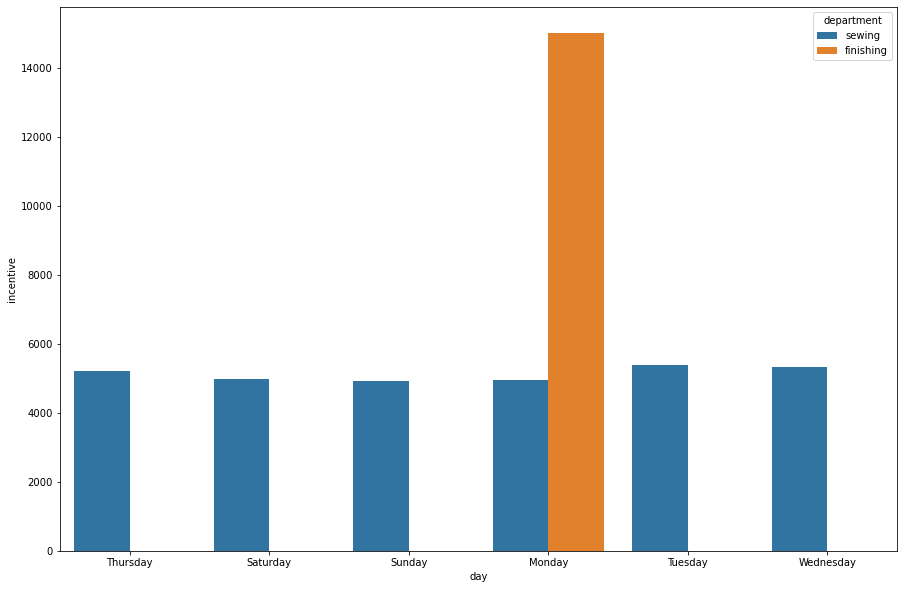

In [28]:
plt.figure(figsize=(15,10))
sns.barplot(x='day', y='incentive', data=df,estimator=sum, ci=None, hue='department');

Incentive by department


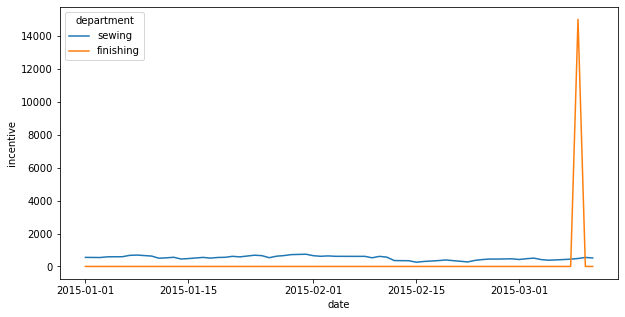

In [29]:
plt.figure(figsize=(10,5))
print('Incentive by department')
sns.lineplot(x='date', y='incentive', data=df,estimator=sum, ci=None, hue='department');

In [30]:
df_inc = df.groupby(['team'])[['incentive']].sum()
df_inc

incentive
team              
team_01       4893
team_02       4165
team_03       4708
team_04       3680
team_05       4570
team_06       2134
team_07       1491
team_08       2712
team_09       6337
team_10       3633
team_11       3336
team_12       4079

Work in progress by date


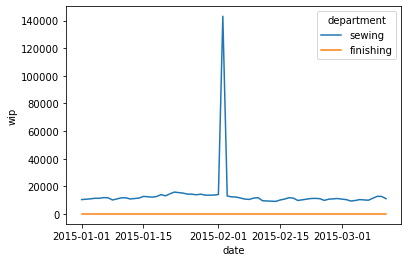

In [31]:
print('Work in progress by date')
sns.lineplot(x='date', y='wip', data=df,estimator=sum, ci=None, hue='department');

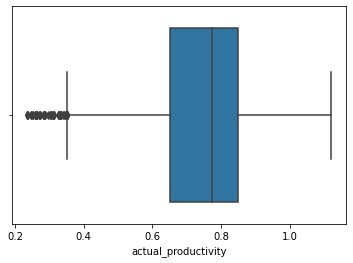

In [32]:
sns.boxplot(x=df['actual_productivity'])

Over time by team and department


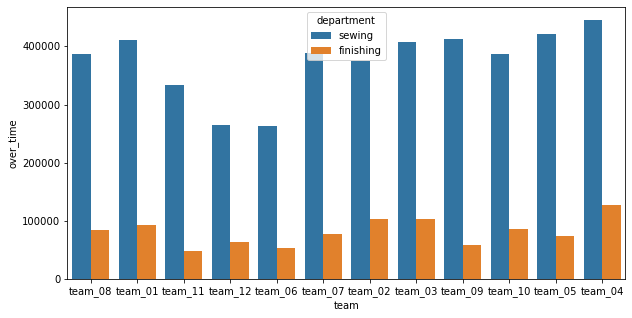

In [33]:
plt.figure(figsize=(10,5))
print('Over time by team and department')
sns.barplot(x='team', y='over_time', data=df,estimator=sum, ci=None, hue='department');

### Profiling Report

In [34]:
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Research questions

1. Does the individual teams 'actual productivity' exceed their 'targeted productivity', and which team is the most/worst productive? Justify your answer

In [35]:
df['exceed_productivity'] = df['actual_productivity'] - df['targeted_productivity']
df['incentive_per_worker'] = df['incentive'] / df['no_of_workers']
df['over_time_per_worker'] = df['over_time'] / df['no_of_workers']
df.head(5)

date   quarter department       day     team  targeted_productivity  \
0 2015-01-01  Quarter1     sewing  Thursday  team_08                   0.80   
1 2015-01-01  Quarter1  finishing  Thursday  team_01                   0.75   
2 2015-01-01  Quarter1     sewing  Thursday  team_11                   0.80   
3 2015-01-01  Quarter1     sewing  Thursday  team_12                   0.80   
4 2015-01-01  Quarter1     sewing  Thursday  team_06                   0.80   

     smv     wip  over_time  incentive  idle_time  idle_men  \
0  26.16  1108.0       7080         98        0.0         0   
1   3.94     0.0        960          0        0.0         0   
2  11.41   968.0       3660         50        0.0         0   
3  11.41   968.0       3660         50        0.0         0   
4  25.90  1170.0       1920         50        0.0         0   

   no_of_style_change  no_of_workers  actual_productivity  \
0                   0           59.0             0.940725   
1                   0            8.0             0.886500   
2                   0           30.5             0.800570   
3                   0           30.5             0.800570   
4                   0           56.0             0.800382   

   exceed_productivity  incentive_per_worker  over_time_per_worker  
0             0.140725              1.661017            120.000000  
1             0.136500              0.000000            120.000000  
2             0.000570              1.639344            120.000000  
3             0.000570              1.639344            120.000000  
4             0.000382              0.892857             34.285714

Box plot exceeded productivity by team and department


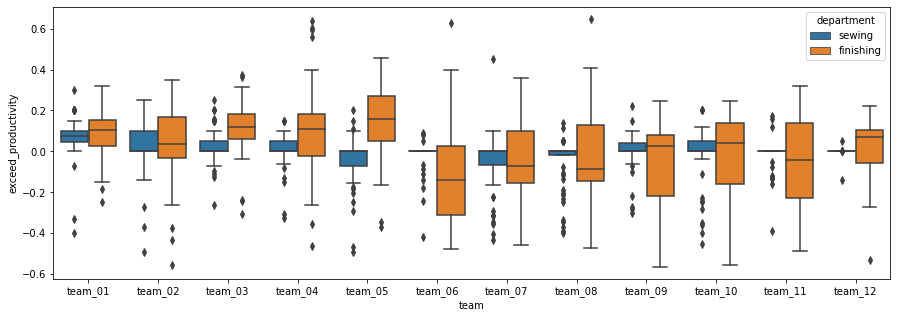

In [36]:
print('Box plot exceeded productivity by team and department')
plt.figure(figsize=(15,5))
sns.boxplot(x='team', y='exceed_productivity', data=df.sort_values(by='team', ascending=True), hue='department');

In [37]:
team_performance = df.groupby(['team'])[['exceed_productivity']].mean()
team_performance.sort_values(by='exceed_productivity', ascending=False)

exceed_productivity
team                        
team_01             0.074388
team_03             0.061775
team_04             0.052416
team_02             0.030947
team_05             0.024325
team_12             0.004813
team_10            -0.018764
team_11            -0.021993
team_09            -0.023711
team_08            -0.034109
team_06            -0.045998
team_07            -0.046265

### Answer research question 1: 
Team_1 is the most productive team and its actual productivity exceeds the target productivity with an average of 0.0744. Team_7 is the worst productive and exceens the target productivity with an average of -0.0463.

### Research question 2
Which of the two garment production processes (i.e., sewing and finishing) is the hardest? Justify your answer

In [38]:
departments = df.groupby(['department'])[['smv']].mean()
departments.sort_values(by='smv', ascending=False)

smv
department           
sewing      23.245412
finishing    3.887036

### Answer research question 2
smv -  Standard Minute Value, it is the allocated time for a task. Since sewing department has higher average value of smv than finishing department, means sewing is the hardest production process. 

### Research question 3
Which of the days is mostly the rest day for the workers and how does the resting affect their productivity afterwards? Justify your answer

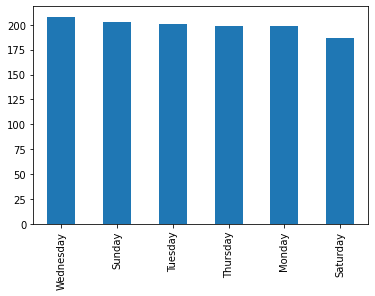

In [39]:
df['day'].value_counts().plot(kind='bar')

Average actual productivity by day


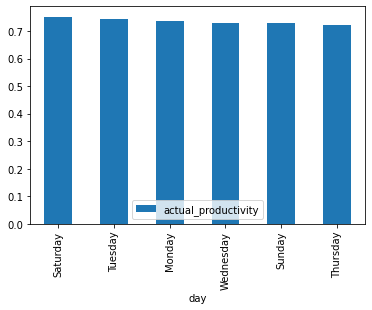

In [40]:
print('Average actual productivity by day')
productivity = df.groupby(['day'])[['actual_productivity']].mean()
productivity.sort_values(by='actual_productivity', ascending=False).plot(kind='bar');

In [41]:
productivity.sort_values(by='actual_productivity', ascending=False)

actual_productivity
day                           
Saturday              0.751929
Tuesday               0.742701
Monday                0.735488
Wednesday             0.730462
Sunday                0.728604
Thursday              0.722641

### Answer research question 3

Friday is the only day not present in the 'day' column, therefore friday is resting day for the workers. 
As we can see in the productivity table, workers are on average most productive on Saturday, which is the day after their resting day. The resting day positively affect the workers productivity, which makes sense. 


### Research question 4
When does the company pay more incentive to its workers? And does both sewing and finishing departments enjoy the same incentives? Justify your answer

#### Average Incentive per day

In [42]:
incentive_per_day = df.groupby(['day', 'department'])['incentive'].mean()
incentive_per_day.to_frame().unstack().reset_index().set_index('day')


incentive           
department   finishing     sewing
day                              
Monday      180.722892  42.698276
Saturday      0.000000  47.932692
Sunday        0.000000  42.293103
Thursday      0.000000  44.118644
Tuesday       0.000000  45.550847
Wednesday     0.000000  44.647059

#### Incentive per quarter

In [43]:
incentive_per_quarter = df.groupby(['quarter', 'department'])['incentive'].mean()
incentive_per_quarter.to_frame().unstack().reset_index().set_index('quarter')

incentive           
department   finishing     sewing
quarter                          
Quarter1      0.000000  46.834123
Quarter2    102.040816  44.468085
Quarter3      0.000000  37.837209
Quarter4      0.000000  43.964286
Quarter5      0.000000  63.478261

### Incentive per date. Day with most paid incentive

In [44]:
incentive_per_date = df.groupby(['date'])[['incentive']].sum()
incentive_per_date.sort_values(by='incentive', ascending=False).head()

incentive
date                 
2015-03-09      15482
2015-01-31        742
2015-01-29        718
2015-01-08        691
2015-01-24        682

### Incentive split by department on date with highest incentive

In [45]:
df_max_incentive = df[df.date == '2015-03-09']
df_max_incentive_dept = df_max_incentive.groupby(['department'])[['incentive']].sum()
df_max_incentive_dept

incentive
department           
finishing       15000
sewing            482

### Total Incentive per department

In [46]:
departments_team = df.groupby(['department'])[['incentive']].sum()
departments_team.sort_values(by='incentive', ascending=False).head()

incentive
department           
sewing          30738
finishing       15000

### Total Incentive per department per worker

In [47]:
departments_team = df.groupby(['department'])[['incentive_per_worker']].sum()
departments_team.sort_values(by='incentive_per_worker', ascending=False).head()

incentive_per_worker
department                      
finishing            1440.000000
sewing                608.013887

### Answer Research question 4
The company pays most incentive on 2015-03-09 which is close to the end of the period in the dataset.As we can see in figure above, the 'finishing' department get all its incentive on one day, while the sewing department gets incentive regurarly. However, the sewing department gets the highest incentive in total during the period, while the finishing department get the highest incentive per worker in total. 


## Prediction model

In [48]:
# import libraries for predictive modelling
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection   import train_test_split


Correlation Matrix


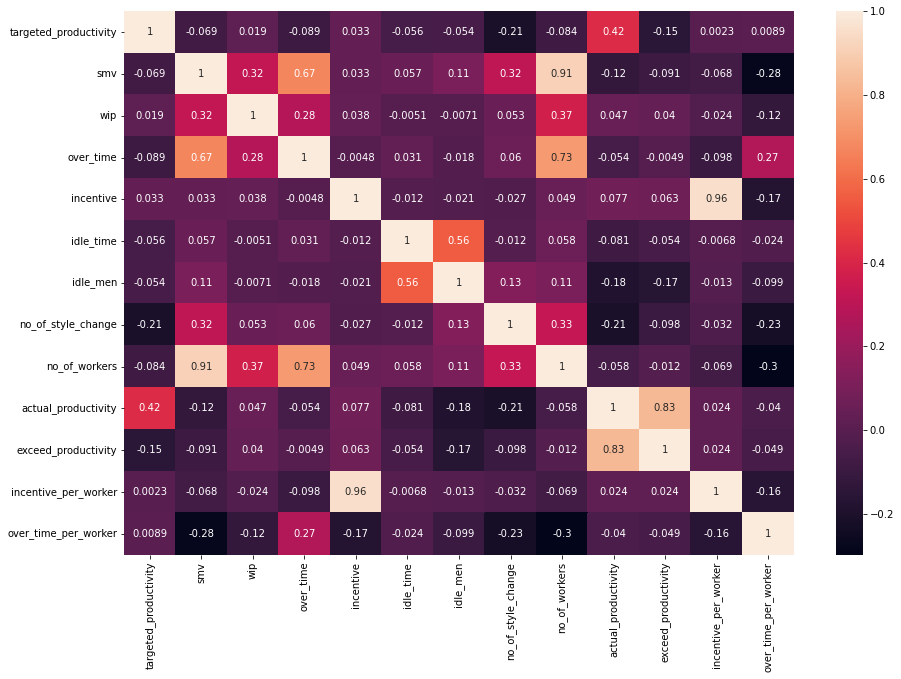

In [49]:
plt.figure(figsize=(15,10))
print('Correlation Matrix')
sns.heatmap(df.corr(),annot=True);

Scatterplot average actual_productivity vs targeted_productivity grouped by date


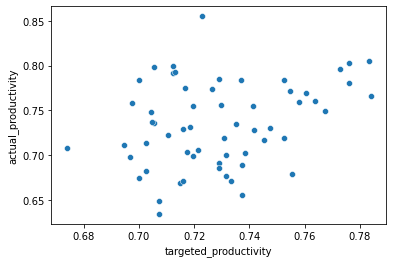

In [50]:
df_average = df.groupby(['date'])[['targeted_productivity', 'actual_productivity']].mean()
print('Scatterplot average actual_productivity vs targeted_productivity grouped by date')
sns.scatterplot(x='targeted_productivity', y='actual_productivity', data=df_average);

### Encoding categorical variables

In [51]:
df= pd.get_dummies(df,columns=['quarter', 'department','day','team'],drop_first=True)


In [52]:
#drop date as it is not useful for our model
df= df.drop('date', axis=1)
df.head()

targeted_productivity    smv     wip  over_time  incentive  idle_time  \
0                   0.80  26.16  1108.0       7080         98        0.0   
1                   0.75   3.94     0.0        960          0        0.0   
2                   0.80  11.41   968.0       3660         50        0.0   
3                   0.80  11.41   968.0       3660         50        0.0   
4                   0.80  25.90  1170.0       1920         50        0.0   

   idle_men  no_of_style_change  no_of_workers  actual_productivity  \
0         0                   0           59.0             0.940725   
1         0                   0            8.0             0.886500   
2         0                   0           30.5             0.800570   
3         0                   0           30.5             0.800570   
4         0                   0           56.0             0.800382   

   exceed_productivity  incentive_per_worker  over_time_per_worker  \
0             0.140725              1.661017            120.000000   
1             0.136500              0.000000            120.000000   
2             0.000570              1.639344            120.000000   
3             0.000570              1.639344            120.000000   
4             0.000382              0.892857             34.285714   

   quarter_Quarter2  quarter_Quarter3  quarter_Quarter4  quarter_Quarter5  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   department_sewing  day_Saturday  day_Sunday  day_Thursday  day_Tuesday  \
0                  1             0           0             1            0   
1                  0             0           0             1            0   
2                  1             0           0             1            0   
3                  1             0           0             1            0   
4                  1             0           0             1            0   

   day_Wednesday  team_team_02  team_team_03  team_team_04  team_team_05  \
0              0             0             0             0             0   
1              0             0             0             0             0   
2              0             0             0             0             0   
3              0             0             0             0             0   
4              0             0             0             0             0   

   team_team_06  team_team_07  team_team_08  team_team_09  team_team_10  \
0             0             0             1             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             1             0             0             0             0   

   team_team_11  team_team_12  
0             0             0  
1             0             0  
2             1             0  
3             0             1  
4             0             0

In [53]:
## Code from lecture

scaler = MinMaxScaler()
scaler.fit(df)
scaled_Attributes = scaler.transform(df)
#Convert to table format - MinMaxScaler
df_scaled = pd.DataFrame(data=scaled_Attributes, index=df.index, columns=df.columns)
df_scaled.sample(5)

targeted_productivity       smv       wip  over_time  incentive  \
964               1.000000  0.032907  0.000000   0.243056   0.000000   
637               1.000000  0.379791  0.051293   0.266204   0.031389   
549               1.000000  0.020132  0.000000   0.046296   0.000000   
793               0.931507  0.307588  0.038708   0.152778   0.000000   
875               0.863014  0.530972  0.032264   0.263889   0.000000   

     idle_time  idle_men  no_of_style_change  no_of_workers  \
964        0.0       0.0                 0.0       0.149425   
637        0.0       0.0                 0.0       0.643678   
549        0.0       0.0                 0.0       0.091954   
793        0.0       0.0                 0.0       0.356322   
875        0.0       0.0                 0.5       0.632184   

     actual_productivity  exceed_productivity  incentive_per_worker  \
964             0.775881             0.566727              0.000000   
637             0.864199             0.631647              0.008118   
549             0.736180             0.537545              0.000000   
793             0.582978             0.466380              0.000000   
875             0.526540             0.466342              0.000000   

     over_time_per_worker  quarter_Quarter2  quarter_Quarter3  \
964              0.583333               0.0               0.0   
637              0.165230               0.0               0.0   
549              0.166667               0.0               0.0   
793              0.166667               0.0               1.0   
875              0.166667               0.0               0.0   

     quarter_Quarter4  quarter_Quarter5  department_sewing  day_Saturday  \
964               1.0               0.0                0.0           1.0   
637               0.0               0.0                1.0           1.0   
549               0.0               0.0                0.0           0.0   
793               0.0               0.0                1.0           0.0   
875               1.0               0.0                1.0           0.0   

     day_Sunday  day_Thursday  day_Tuesday  day_Wednesday  team_team_02  \
964         0.0           0.0          0.0            0.0           0.0   
637         0.0           0.0          0.0            0.0           1.0   
549         1.0           0.0          0.0            0.0           0.0   
793         0.0           0.0          0.0            0.0           0.0   
875         1.0           0.0          0.0            0.0           1.0   

     team_team_03  team_team_04  team_team_05  team_team_06  team_team_07  \
964           1.0           0.0           0.0           0.0           0.0   
637           0.0           0.0           0.0           0.0           0.0   
549           0.0           0.0           0.0           0.0           0.0   
793           0.0           0.0           0.0           1.0           0.0   
875           0.0           0.0           0.0           0.0           0.0   

     team_team_08  team_team_09  team_team_10  team_team_11  team_team_12  
964           0.0           0.0           0.0           0.0           0.0  
637           0.0           0.0           0.0           0.0           0.0  
549           0.0           0.0           1.0           0.0           0.0  
793           0.0           0.0           0.0           0.0           0.0  
875           0.0           0.0           0.0           0.0           0.0

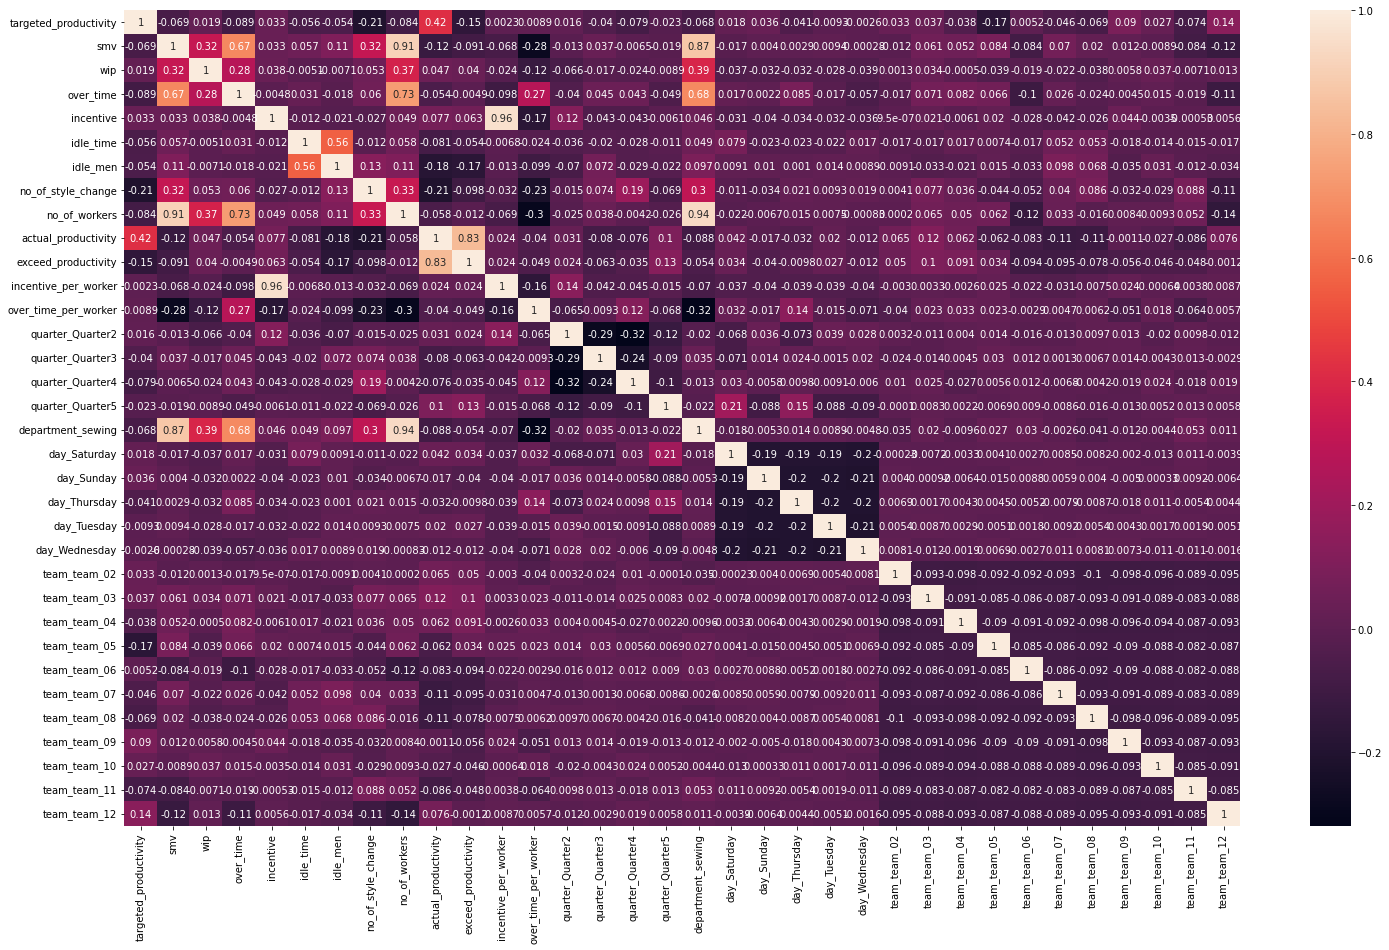

In [54]:
plt.figure(figsize=(25,15))
sns.heatmap(df_scaled.corr(),annot=True)

In [55]:
## code from lecture

correlation_target = abs(df_scaled.corr()["actual_productivity"])
selected_features_heatmap = correlation_target[correlation_target>0.10]
print(selected_features_heatmap)

targeted_productivity    0.421594
smv                      0.122089
idle_men                 0.181734
no_of_style_change       0.207366
actual_productivity      1.000000
exceed_productivity      0.832182
quarter_Quarter5         0.102019
team_team_03             0.115799
team_team_07             0.113576
team_team_08             0.110596
Name: actual_productivity, dtype: float64


In [56]:
# splitting in x and y with the chosen predictors

x = df_scaled[['targeted_productivity', 'smv','idle_men', 'no_of_style_change' ]]

y = df_scaled['actual_productivity']

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [58]:
# splitting dataset in 80 % training and 20 % test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [59]:
Regmodel = LinearRegression()  
Regmodel.fit(X_train,y_train)  

LinearRegression()

In [60]:
print("Intercept: ", Regmodel.intercept_)
print("Coefficients:")
list(zip(x, Regmodel.coef_))

Intercept:  0.08488900641114883
Coefficients:


[('targeted_productivity', 0.5566056584389907),
 ('smv', -0.056743690306742235),
 ('idle_men', -0.3828957071474785),
 ('no_of_style_change', -0.06885853320439783)]

In [61]:
# Create table with regression equation
coff = list(zip(x, Regmodel.coef_))
equation_df = pd.DataFrame


eq = {'Intercept_b0':Regmodel.intercept_,
        'targeted_productivity_b1':coff[0],
        'smv_b2': coff[1], 
        'idle_men_b3':coff[2],
        'no_of_style_change_b4':coff[3]}
eq_df = pd.DataFrame(data=eq)

eq_df = eq_df[eq_df.index > 0]
print('Regression equation')
eq_df

Regression equation


Intercept_b0 targeted_productivity_b1     smv_b2 idle_men_b3  \
1      0.084889                 0.556606 -0.0567437   -0.382896   

  no_of_style_change_b4  
1            -0.0688585

In [62]:
# Create table of predicted value vs actual value, include residuals

y_pred_test= Regmodel.predict(X_test)
y_pred_train= Regmodel.predict(X_train)
y_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_test})
y_diff['residual'] = y_diff['Actual value'] - y_diff['Predicted value']
print('Comparison of actual value and predicted value from the test set')
y_diff.head(10)

Comparison of actual value and predicted value from the test set


Actual value  Predicted value  residual
700       0.639084         0.627918  0.011166
621       0.864093         0.640352  0.223740
319       0.823699         0.640352  0.183347
837       0.458475         0.640352 -0.181877
761       0.413588         0.410794  0.002794
592       0.526436         0.540632 -0.014196
1049      0.735533         0.639627  0.095905
124       0.201204         0.609718 -0.408513
251       0.525965         0.545597 -0.019632
531       0.832451         0.487858  0.344594

Residual Plot


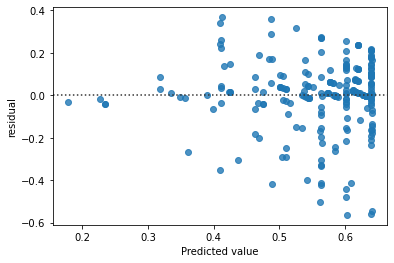

In [63]:
print('Residual Plot')
sns.residplot(x='Predicted value', y='residual',data=y_diff);

Residual Histogram


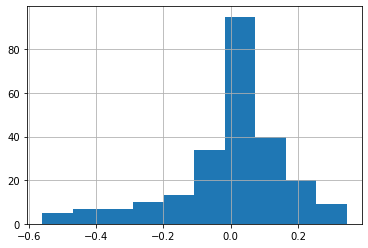

In [64]:
print('Residual Histogram')
y_diff['residual'].hist();

In [65]:
from sklearn.metrics import r2_score

print('R squared test: {:.2f}'.format(r2_score(y_test,y_pred_test)*100))
print('R squared train: {:.2f}'.format(r2_score(y_train,y_pred_train)*100))



R squared test: 27.15
R squared train: 20.17
